## 아달린 파이썬 구현 - 배치경사하강법(BSD)

In [15]:
from IPython.display import Image

In [17]:
# 퍼셉트론과 아달린의 차이
Image(url='https://git.io/JtIbn', width=600)

In [18]:
print("아달린은 경사하강법을 이용해 비용을 최소화한다")
Image(url='https://git.io/JtIbc', width=500)

아달린은 경사하강법을 이용해 비용을 최소화한다


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier, resolution=0.02):
    #마커와 컬러맵 설정
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','grey','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #결정 경계 그리기
    x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution),
                          )
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0],
                    y = X[y == cl, 1],
                    alpha = 0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
        

In [3]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/'
                'machine-learning-databases/iris/iris.data',
                header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
y = df.iloc[0:100,4].values
y = np.where(y =='Iris-setosa',-1,1)

X = df.iloc[0:100,[0,2]].values # 꽃받침 길이와 꽃잎 길이

In [5]:
class AdalineGD(object):
  """적응형 선형 뉴런 분류기

  매개변수
  eta: float         학습률(0.0~1.0 사이) 
  n_iter: int        훈련 데이터셋 반복 횟수
  random_state: int  가중치 무작위 초길화를 위한 난수 생성기 시드

  속성
  w_: 1d-array       학습된 가중치
  cost_ : list       에포크마다 누적된 비용 함수의 제곱합
  """


  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state=random_state

  def fit(self, X, y):
    """훈련 데이터 학습
    매개변수
    X: {array-like}, shape = [n_samples, n_features]   n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
    y: array-like, shape = [n_samples]                 타깃값

    반환값
    self: object

    """


    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size = 1+X.shape[1])
    self.cost_ = []
    
    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)

    return self

  def net_input(self, X):
    """최종 입력 계산"""
    return np.dot(X, self.w_[1:])+self.w_[0]
  
  def activation(self, X):
    """선형 활성화 계산"""
    return X
  
  def predict(self, X):
    """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다."""
    return np.where(self.activation(self.net_input(X))>=0.0, 1, -1)

In [ ]:
class AdalineGD(object):
    """적응형 선형 뉴런 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 비용 함수의 제곱합

    """
    #이전과 마찬가지로 eta와 n_iter(반복 횟수) 지정.
    #그리고 random_state를 주어서 모델을 훈련해서 출력한 결과와 동일해지도록 했음
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples(샘플의 갯수), n_features(특성)] 인 2차원 배열
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples] 인 1차원 배열
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            
            #아래 작성된 net_input함수를 적용
            #activation 함수는 항등함수 (입력값을 바로 리턴) 
            output = self.activation(net_input)
            #이 에러 변수에는 모든 샘플에 대한 오차값이 담기게 됨
            errors = (y - output)
            #이 오차를 다시 X.T(전치 행렬)와 점곱 시행
            #이 전체 루프 안에서 가중치를 업데이트 하는 구문은 딱 한번
            self.w_[1:] += self.eta * X.T.dot(errors)
            #w_0는 절편
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

	# 샘플X특성으로 구성된 2차원 배열 X와 특성의 개수만큼의 1차원 가중치 배열 W를 점곱을 하면 각 샘플마다 점곱이 이루어지게 됨. 샘플의 갯수만큼 결과가 만들어짐.
    # 그리고 샘플 개수의 절편(w0)을 다 더하면 모든 원소의 절편이 더해짐. (?) '브로드캐스팅' 이라고 함
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

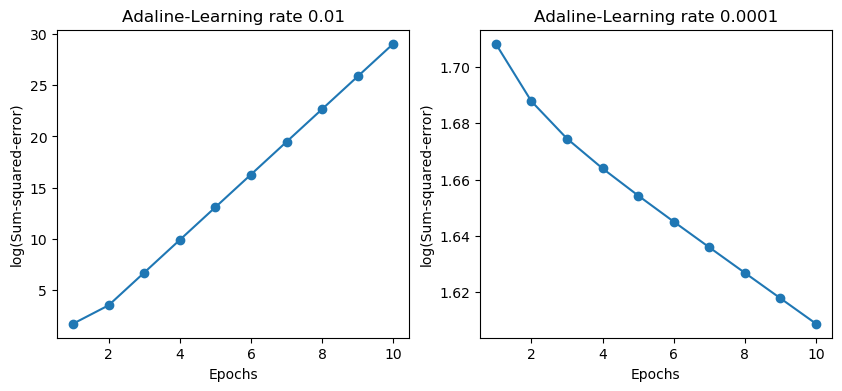

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1, len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline-Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_)+1), np.log10(ada2.cost_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Sum-squared-error)')
ax[1].set_title('Adaline-Learning rate 0.0001')
plt.show()

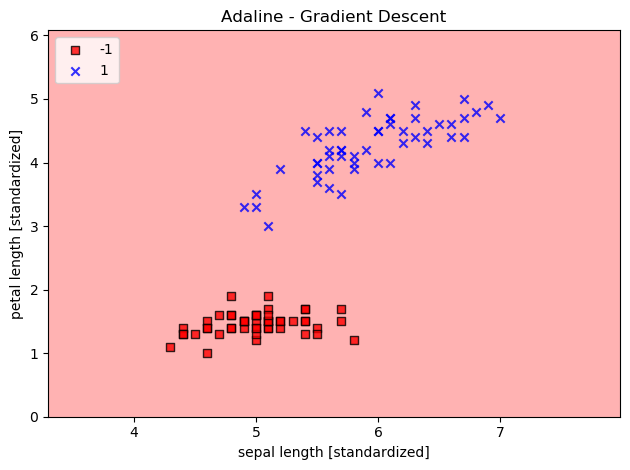

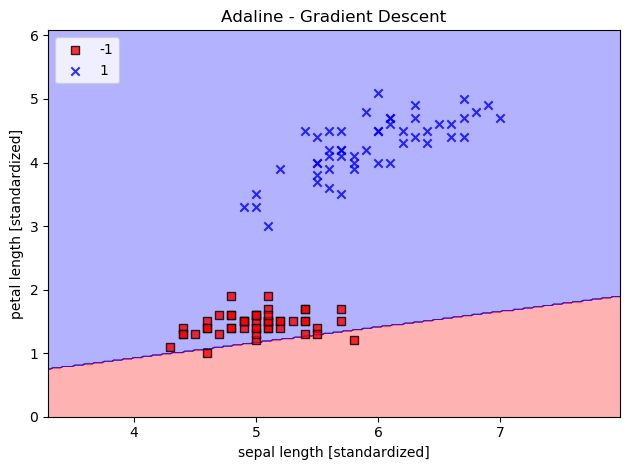

In [7]:
plot_decision_regions(X, y, classifier=ada1)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plot_decision_regions(X, y, classifier=ada2)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### 해석
 - 왼쪽: 학습률이 너무 클 때 발생.비용 함수를 최소화 하지 못하고 오차는 에포크마다 점점 더 커짐. 전역 최솟값을 지나쳤기 때문
 - 오른쪽: 비용이 감소하지만 학습률이 너무 작아 알고리즘이이 전역 최솟값에 수렴하려면 아주 많은 에포크가 필요 

## 특정 스케일을 조정하여 경사하강법 결과 향상
- 표준화를 이용하여 평균0, 표준편차1 로 변환

In [12]:
X_std = np.copy(X)
X_std[:,0]=(X[:,0]-X[:,0].mean()) / X[:,0].std()
X_std[:,1]=(X[:,1]-X[:,1].mean()) / X[:,1].std()

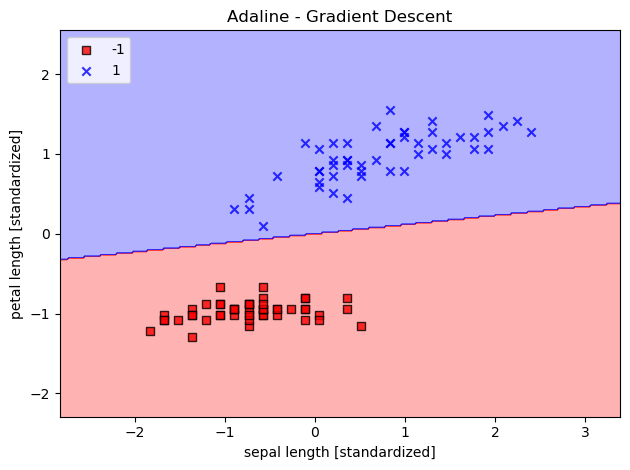

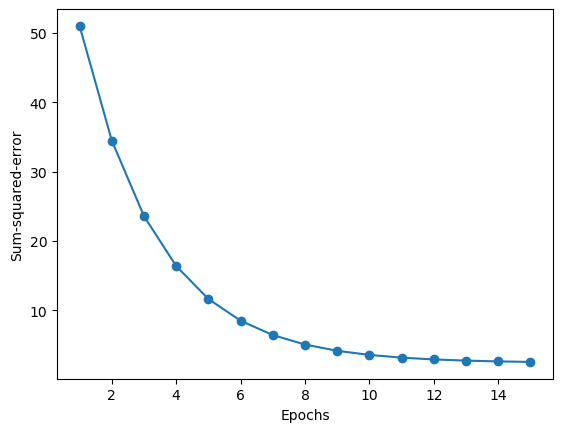

In [13]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std,y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada.cost_)+1),ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()

- 배치경사하강법(BSD)의 경우, 계산 비용이 매우 많이 듦.전역최 솟값으로 나아가는 단계마다 매번 전체 훈련 데이터셋을 다시 평가 해야 하기 때문임

## 확률적 경사 하강법(SGD,stochastic gradient descent): 
- 배치경사하강법의 대안으로 많이 이용됨. 
- 모든 샘플xi에 대하여 누적된 오차의 합을 기반으로 가중치를 업데이트하는 대신 각각 훈련된 샘플에 대해서 조금씩 가중치를 업데이트함
- 수렴속도가 빠르고 비선형 비용함수를 다룰 때 얕은 지역 최솟값을 더 쉽게 탈출할 수 있음
- 만족스러운 결과를 얻기 위해서는 훈련샘플 순서를 무작위하게 주입하는 것이 중요하고 순환되지 않도록 에포크마다 훈려련 세트를 섞는 것이 좋음

In [25]:
class AdalineSGD(object):
    """적응형 선형 뉴런 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    shuffle : bool (default: True)
      True로 설정하면 같은 방복이 되지 않도록 에포크마다 훈련 데이터를 섞음
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 비용 함수의 제곱합

    """
    #이전과 마찬가지로 eta와 n_iter(반복 횟수) 지정.
    #그리고 random_state를 주어서 모델을 훈련해서 출력한 결과와 동일해지도록 했음
    def __init__(self, eta=0.01, n_iter=50, shuffle=True, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples(샘플의 갯수), n_features(특성)] 인 2차원 배열
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples] 인 1차원 배열
          타깃 벡터

        반환값
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
        
    def partial_fit(self, X, y):
        """가중치를 다시 초기화하지 않고 훈련 데이터를 학습합니다. -> 온라인 학습!!!"""
        if not self.w_initialized:
            self._initialized_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    def _shuffle(self, X, y):
        """훈련데이터 섞습니다."""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]

    def _initialize_weights(self, m):
        """랜덤한 작은 수로 가중치를 초기화합니다."""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1+m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """아달린 학습 규칙을 적용하여 가중치를 업데이트합니다."""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

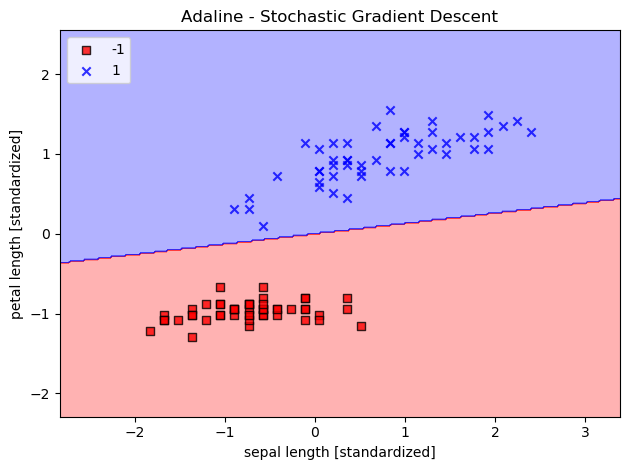

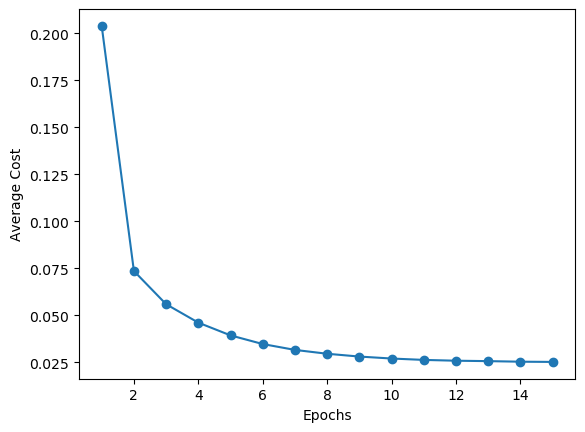

In [26]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state =1)
ada_sgd.fit(X_std,y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_sgd.cost_)+1),ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

### 온라인 학습 방식으로 모델은 훈련하려면 개개의 샘플마다 partial_fit 메서드 호출

In [27]:
ada_sgd.partial_fit(X_std[0, :], y[0])